In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Employee Attrition.csv")
df

,Age,Gender,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Distance from Home,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,31,Male,Education,5390,Excellent,Medium,Average,2,No,22,...,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,59,Female,Media,5534,Poor,High,Low,3,No,21,...,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,24,Female,Healthcare,8159,Good,High,Low,0,No,11,...,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,36,Female,Education,3989,Good,High,High,1,No,27,...,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,56,Male,Education,4821,Fair,Very High,Average,0,Yes,71,...,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59593,50,Female,Education,4414,Fair,High,Average,1,Yes,66,...,2,Senior,Small,35,No,No,Yes,Poor,Very High,Left
59594,18,Male,Healthcare,8040,Fair,High,High,3,No,42,...,0,Senior,Medium,73,No,No,No,Fair,Medium,Left
59595,22,Female,Technology,7944,Fair,High,High,0,Yes,34,...,2,Entry,Small,29,No,Yes,No,Good,Medium,Stayed
59596,23,Male,Education,2931,Fair,Very High,Average,0,No,62,...,0,Entry,Large,9,No,No,No,Good,Low,Left


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59598 entries, 0 to 59597
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       59598 non-null  int64 
 1   Gender                    59598 non-null  object
 2   Job Role                  59598 non-null  object
 3   Monthly Income            59598 non-null  int64 
 4   Work-Life Balance         59598 non-null  object
 5   Job Satisfaction          59598 non-null  object
 6   Performance Rating        59598 non-null  object
 7   Number of Promotions      59598 non-null  int64 
 8   Overtime                  59598 non-null  object
 9   Distance from Home        59598 non-null  int64 
 10  Education Level           59598 non-null  object
 11  Marital Status            59598 non-null  object
 12  Number of Dependents      59598 non-null  int64 
 13  Job Level                 59598 non-null  object
 14  Company Size          

In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
num_cols = df.describe().columns.tolist()

In [6]:
cat_cols = [i for i in df.columns if i not in num_cols]

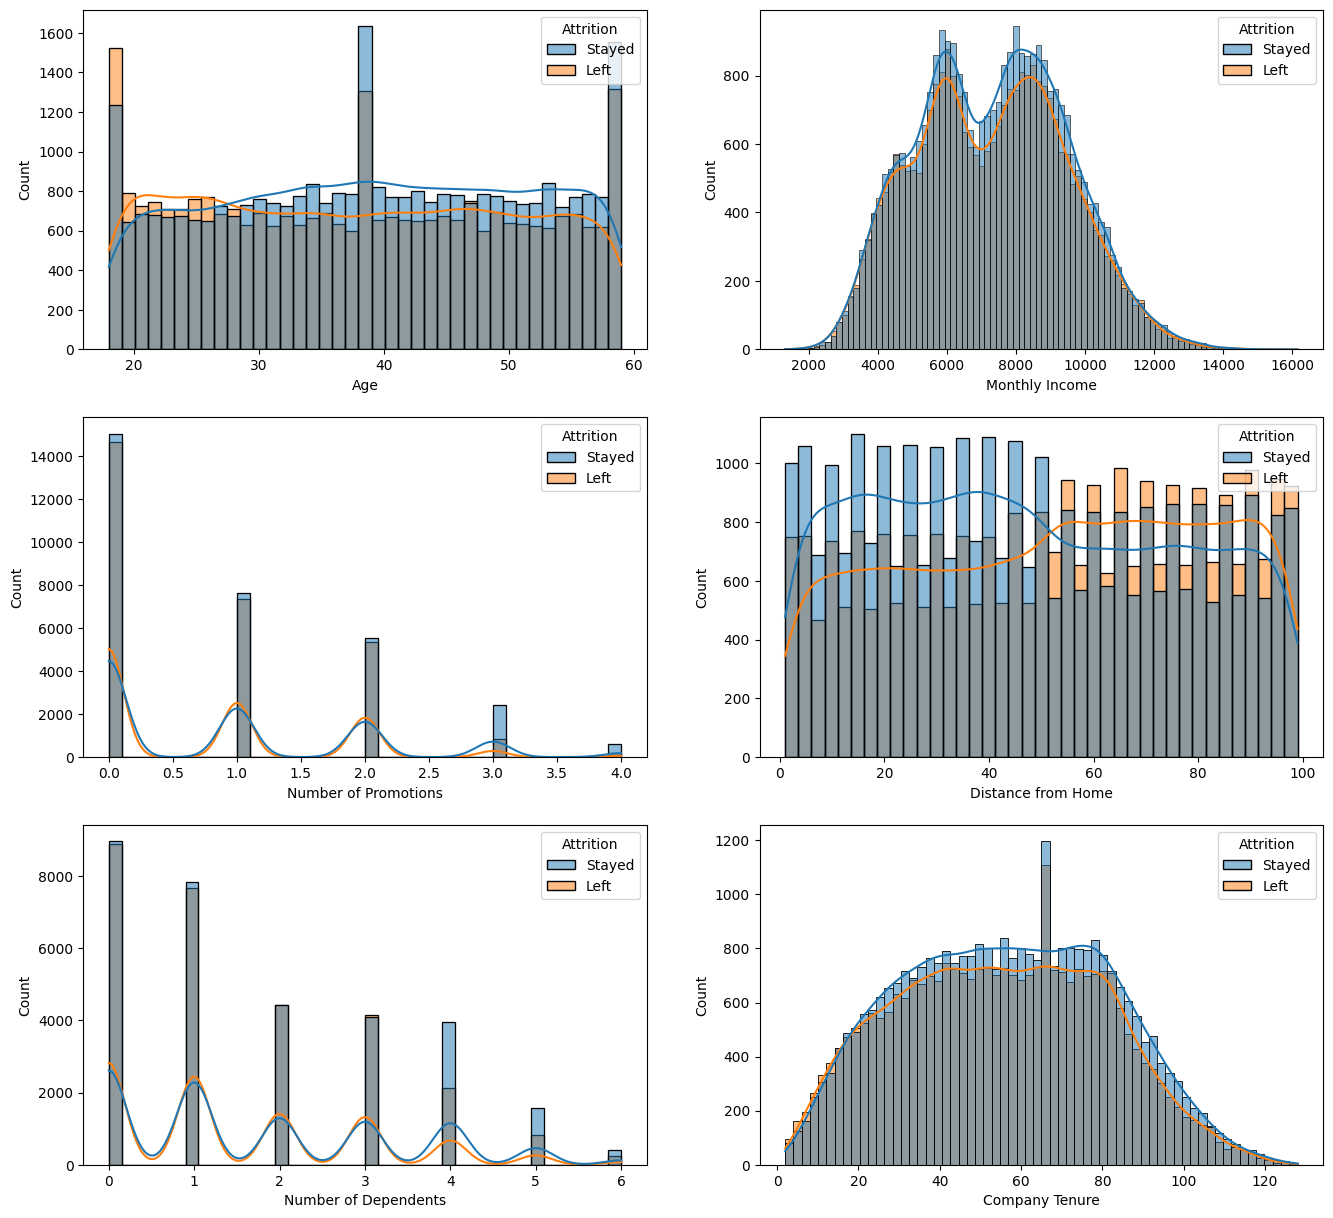

In [7]:
plt.figure(figsize=(16,15))
for i in range(len(num_cols)):
    plt.subplot(3, 2, i+1)
    sns.histplot(df, x=num_cols[i] , kde=True , hue = "Attrition")
plt.show()

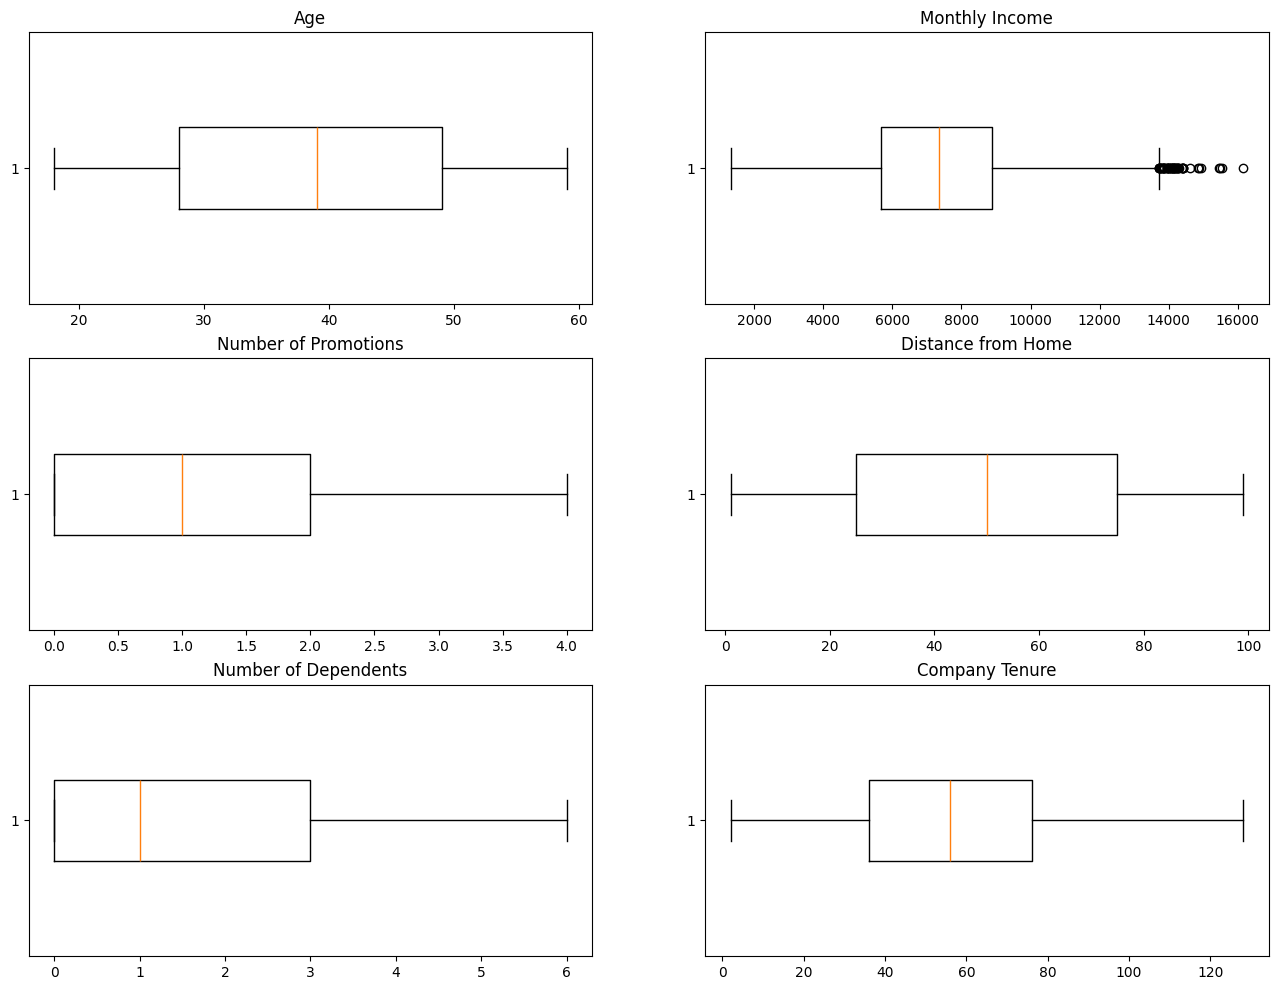

In [8]:
plt.figure(figsize=(16,12))
for i in range(len(num_cols)):
    plt.subplot(3, 2, i+1)
    plt.title(num_cols[i])
    plt.boxplot(df[num_cols[i]] , vert = False , widths= 0.3)
plt.show()

In [9]:
for i in cat_cols:
    print(df[i].value_counts())
    print("="*30)

Gender
Male      32739
Female    26859
Name: count, dtype: int64
Job Role
Technology    15507
Healthcare    13642
Education     12490
Media          9574
Finance        8385
Name: count, dtype: int64
Work-Life Balance
Good         22528
Fair         18046
Excellent    10719
Poor          8305
Name: count, dtype: int64
Job Satisfaction
High         29779
Very High    12111
Medium       11817
Low           5891
Name: count, dtype: int64
Performance Rating
Average          35810
High             11888
Below Average     8950
Low               2950
Name: count, dtype: int64
Overtime
No     40148
Yes    19450
Name: count, dtype: int64
Education Level
Bachelor’s Degree    17826
Associate Degree     14915
Master’s Degree      12020
High School          11748
PhD                   3089
Name: count, dtype: int64
Marital Status
Married     29908
Single      20835
Divorced     8855
Name: count, dtype: int64
Job Level
Entry     23867
Mid       23753
Senior    11978
Name: count, dtype: int64
Company

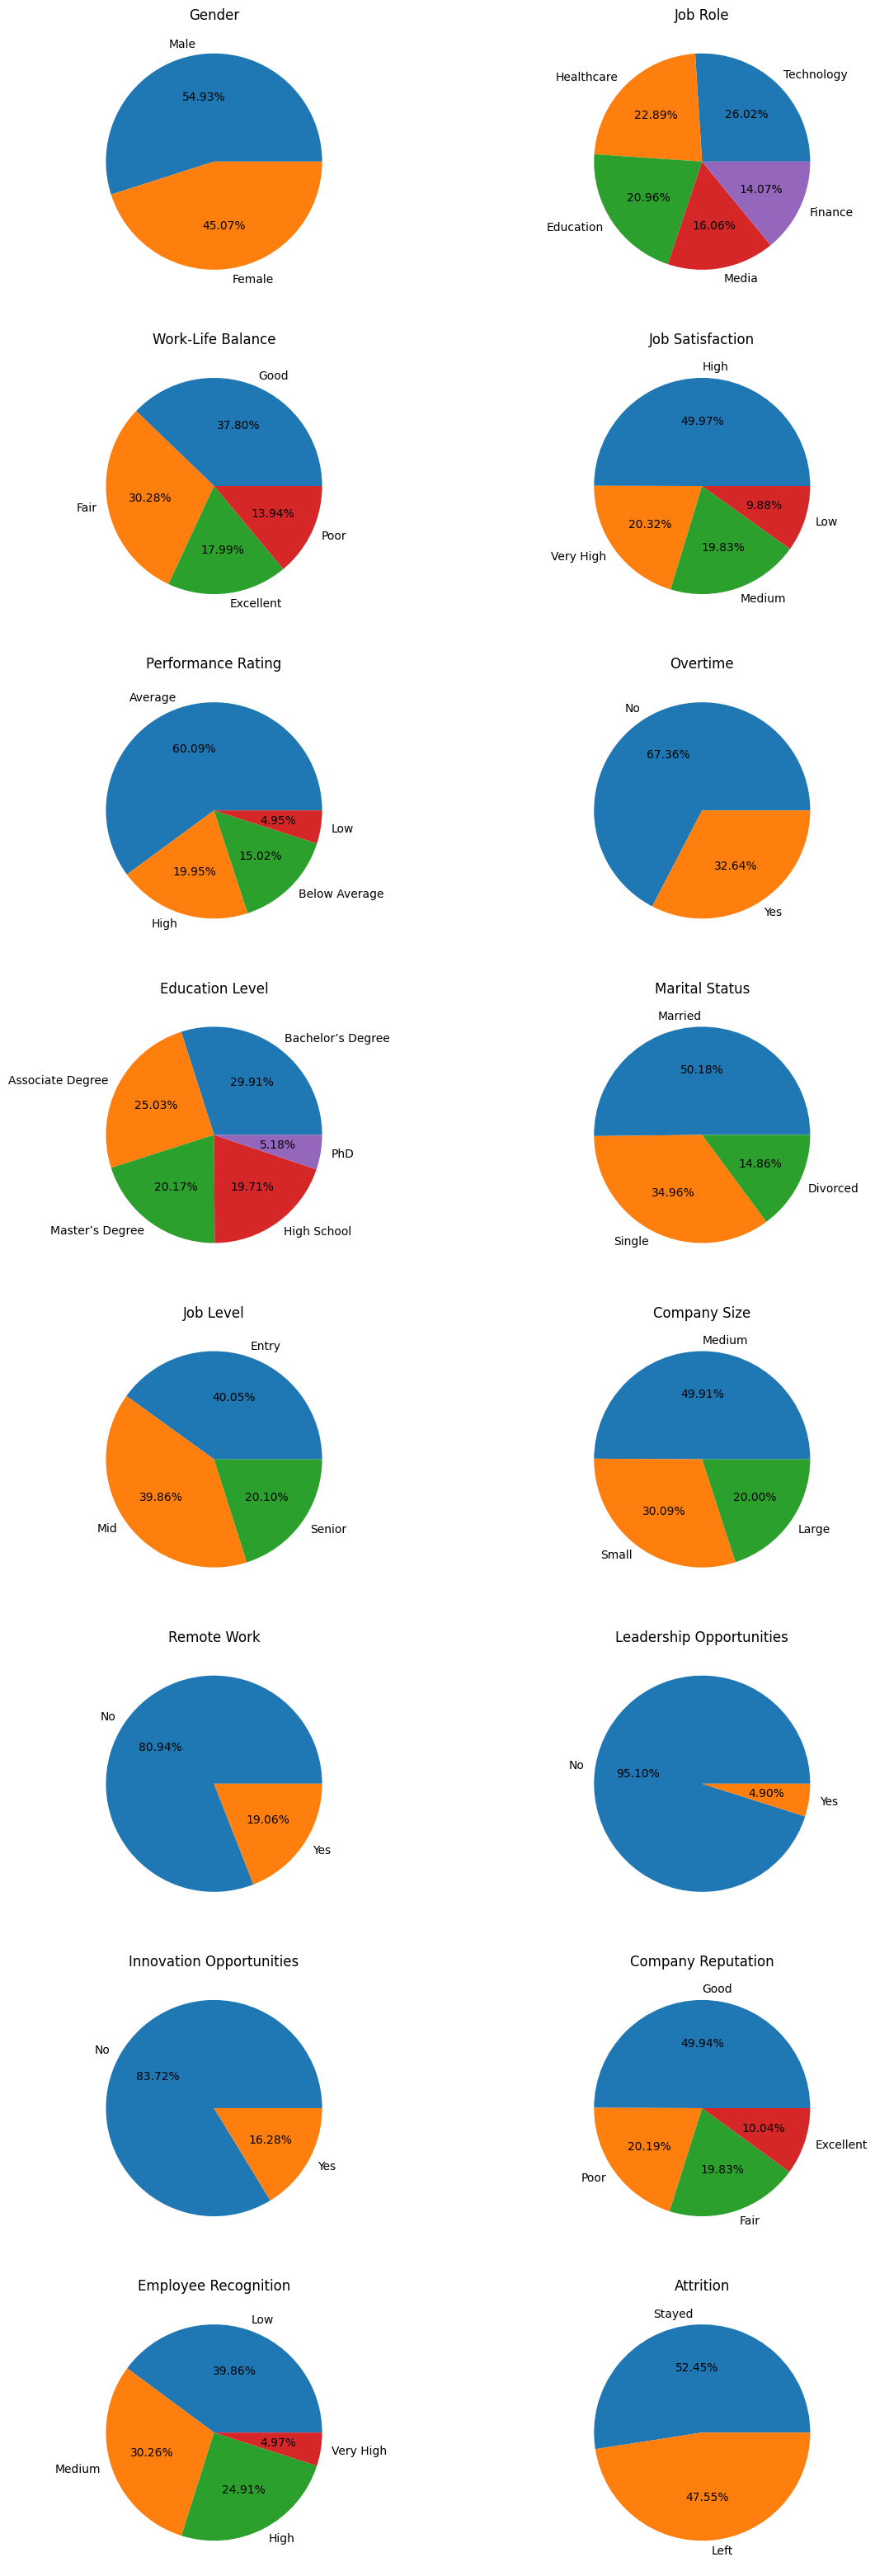

In [10]:
plt.figure(figsize=(14,40))
for i in range(len(cat_cols)):
    plt.subplot(8, 2, i+1)
    plt.title(cat_cols[i])
    plt.pie(df[cat_cols[i]].value_counts().values, labels=df[cat_cols[i]].value_counts().index, autopct="%.2f%%")
plt.show()

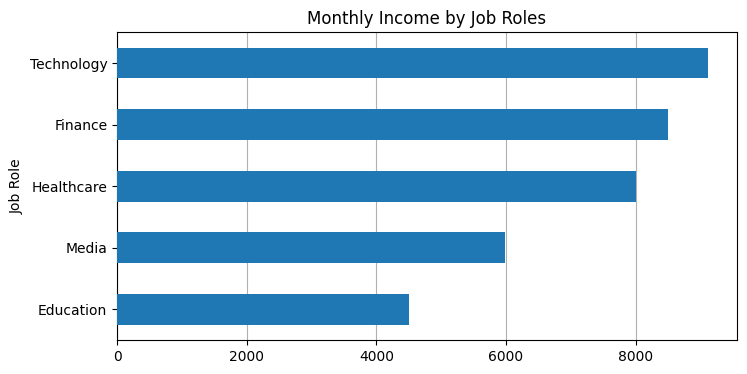

In [11]:
df.groupby("Job Role")[num_cols].mean()["Monthly Income"].sort_values().plot.barh(figsize = (8,4), zorder = 3)
plt.grid(axis="x" , zorder=1)
plt.title("Monthly Income by Job Roles")
plt.show()

In [12]:
df.groupby("Gender")[num_cols].mean()

,Age,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure
Gender,,,,,,
Female,38.608921,7306.613798,0.831677,50.063145,1.639376,55.752485
Male,38.530560,7298.939338,0.833318,49.962125,1.655212,55.763279


In [13]:
df.groupby("Work-Life Balance")[num_cols].mean()

,Age,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure
Work-Life Balance,,,,,,
Excellent,38.733837,7308.389589,0.808284,50.152626,1.658644,56.196753
Fair,38.517732,7296.578244,0.833149,49.979331,1.649396,55.782611
Good,38.579324,7305.346325,0.839577,50.234686,1.640181,55.704989
Poor,38.417219,7299.312944,0.843709,49.266225,1.652980,55.285009


In [14]:
df.groupby(cat_cols[3])[num_cols].mean()

,Age,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure
Job Satisfaction,,,,,,
High,38.535646,7302.629235,0.834313,50.049632,1.637261,55.788542
Low,38.506705,7299.776948,0.825157,50.331183,1.661857,55.439144
Medium,38.602268,7340.513751,0.832276,49.460100,1.634933,55.835999
Very High,38.633474,7265.913797,0.832219,50.281315,1.680786,55.763934


In [15]:
df.groupby(cat_cols[4])[num_cols].mean()

,Age,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure
Performance Rating,,,,,,
Average,38.589696,7302.544289,0.833426,49.850880,1.657442,55.897487
Below Average,38.514302,7321.760670,0.821341,50.503352,1.626480,55.611397
High,38.563257,7308.190697,0.840175,50.118691,1.639048,55.468876
Low,38.443729,7218.533898,0.825763,49.959322,1.636271,55.683051


In [16]:
df.groupby(cat_cols[5])[num_cols].mean()

,Age,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure
Overtime,,,,,,
No,38.582669,7309.465727,0.834587,49.962115,1.645786,55.755430
Yes,38.531208,7287.808997,0.828432,50.101645,1.652802,55.764576


In [17]:
df.groupby(cat_cols[6])[num_cols].mean()

,Age,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure
Education Level,,,,,,
Associate Degree,38.431244,7322.457124,0.825746,50.362387,1.649480,55.614281
Bachelor’s Degree,38.617413,7292.325087,0.837541,49.938741,1.639179,55.845058
High School,38.535666,7301.942543,0.826183,49.925094,1.660793,55.427307
Master’s Degree,38.612729,7294.806323,0.840599,49.811148,1.655990,55.990349
PhD,38.851084,7294.945613,0.830042,49.771123,1.613467,56.311104


In [18]:
df.groupby(cat_cols[7])[num_cols].mean()

,Age,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure
Marital Status,,,,,,
Divorced,38.506042,7284.920610,0.828120,49.779898,1.64122,56.124901
Married,38.505718,7317.788184,0.830848,49.889428,1.65006,55.562960
Single,38.677658,7287.733813,0.836957,50.274154,1.64814,55.883225


In [19]:
df.groupby(cat_cols[8])[num_cols].mean()

,Age,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure
Job Level,,,,,,
Entry,38.596221,7325.224662,0.831190,50.056228,1.647212,55.819374
Mid,38.605187,7278.959837,0.833495,50.056203,1.642529,55.727866
Senior,38.427450,7303.393304,0.833528,49.814577,1.660795,55.697529


In [20]:
df.groupby(cat_cols[9])[num_cols].mean()

,Age,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure
Company Size,,,,,,
Large,38.604799,7317.602618,0.831599,49.399815,1.667310,55.859624
Medium,38.530476,7299.621583,0.831871,50.200605,1.639065,55.737771
Small,38.598718,7296.898968,0.834402,50.091553,1.650237,55.725397


In [21]:
df.groupby(cat_cols[10])[num_cols].mean()

,Age,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure
Remote Work,,,,,,
No,38.565538,7304.620245,0.830345,50.041481,1.649557,55.775431
Yes,38.567303,7292.960560,0.842064,49.863985,1.641782,55.686152


In [22]:
df.groupby(cat_cols[11])[num_cols].mean()

,Age,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure
Leadership Opportunities,,,,,,
No,38.577117,7304.625265,0.833680,49.990490,1.650141,55.736803
Yes,38.347498,7259.134681,0.811172,50.340987,1.607951,56.178204


In [23]:
df.groupby(cat_cols[12])[num_cols].mean()

,Age,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure
Innovation Opportunities,,,,,,
No,38.568293,7304.919571,0.832749,49.971179,1.649143,55.740395
Yes,38.553437,7289.431413,0.831702,50.195197,1.642585,55.851077


In [24]:
df.groupby(cat_cols[13])[num_cols].mean()

,Age,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure
Company Reputation,,,,,,
Excellent,38.536031,7296.265173,0.849022,50.000000,1.639692,55.139107
Fair,38.572734,7315.579335,0.828806,50.176018,1.631802,55.928154
Good,38.525365,7295.644124,0.833770,50.015958,1.652355,55.875764
Poor,38.674173,7309.207994,0.825162,49.825578,1.657637,55.609274


In [25]:
df.groupby(cat_cols[14])[num_cols].mean()

,Age,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure
Employee Recognition,,,,,,
High,38.622608,7306.513204,0.822891,49.975748,1.637699,55.704594
Low,38.588560,7310.155190,0.832730,49.896666,1.651107,55.910683
Medium,38.509011,7295.887151,0.838241,50.154772,1.656352,55.681140
Very High,38.445832,7259.207897,0.845427,50.161998,1.625380,55.277422


In [26]:
df.groupby(cat_cols[15])[num_cols].mean()

,Age,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure
Attrition,,,,,,
Left,37.945480,7276.689533,0.748359,52.864987,1.520079,54.950138
Stayed,39.128279,7325.703359,0.908925,47.417402,1.764107,56.491139


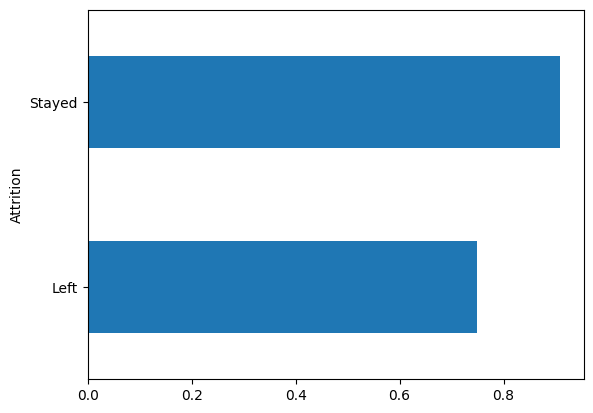

In [27]:
df.groupby(cat_cols[15])["Number of Promotions"].mean().plot.barh()
plt.show()

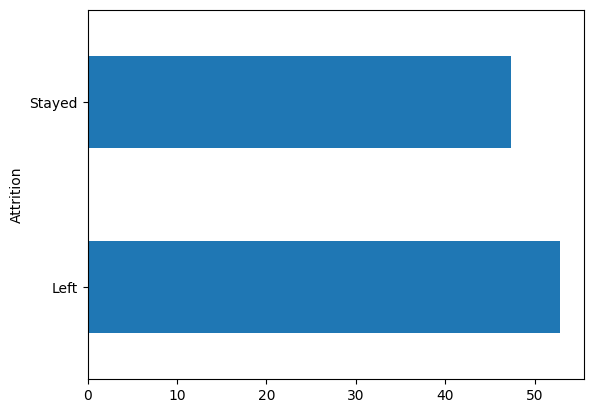

In [28]:
df.groupby(cat_cols[15])["Distance from Home"].mean().plot.barh()
plt.show()

In [29]:
# Employees who stayed have distance from home less than 50 and the employees who left lived have distance from home more than 50

In [30]:
for i in cat_cols[:-1]:
    print(df.groupby(i)["Attrition"].value_counts())
    print("="*40)

Gender  Attrition
Female  Left         14279
        Stayed       12580
Male    Stayed       18680
        Left         14059
Name: count, dtype: int64
Job Role    Attrition
Education   Stayed       6405
            Left         6085
Finance     Stayed       4461
            Left         3924
Healthcare  Stayed       7188
            Left         6454
Media       Stayed       5032
            Left         4542
Technology  Stayed       8174
            Left         7333
Name: count, dtype: int64
Work-Life Balance  Attrition
Excellent          Stayed        6880
                   Left          3839
Fair               Left         10370
                   Stayed        7676
Good               Stayed       13391
                   Left          9137
Poor               Left          4992
                   Stayed        3313
Name: count, dtype: int64
Job Satisfaction  Attrition
High              Stayed       16290
                  Left         13489
Low               Left          3088
  

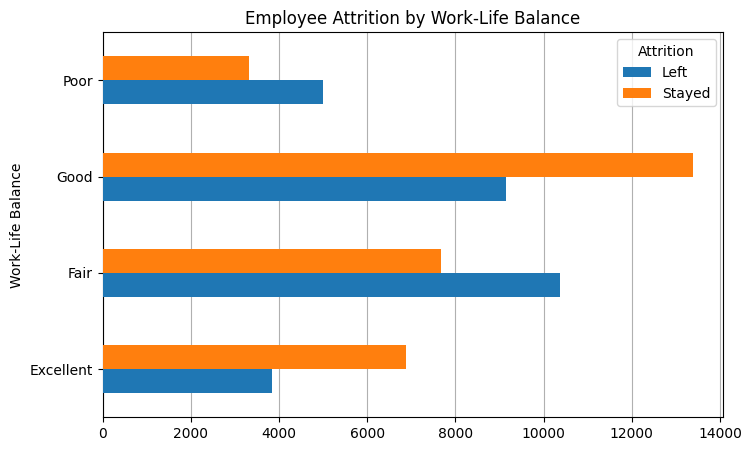

In [31]:
pd.crosstab(df["Work-Life Balance"], df["Attrition"]).plot.barh(zorder = 3, figsize = (8,5))
plt.grid(axis="x", zorder = 1)
plt.title("Employee Attrition by Work-Life Balance")
plt.show()

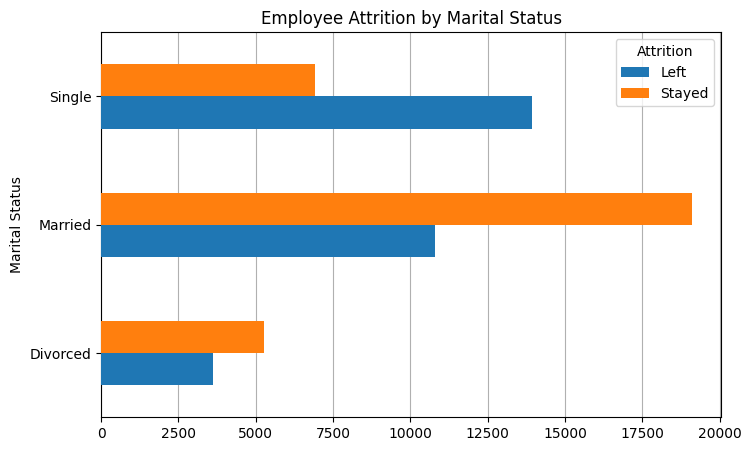

In [32]:
pd.crosstab(df["Marital Status"], df["Attrition"]).plot.barh(zorder = 3, figsize = (8,5))
plt.grid(axis="x", zorder = 1)
plt.title("Employee Attrition by Marital Status")
plt.show()

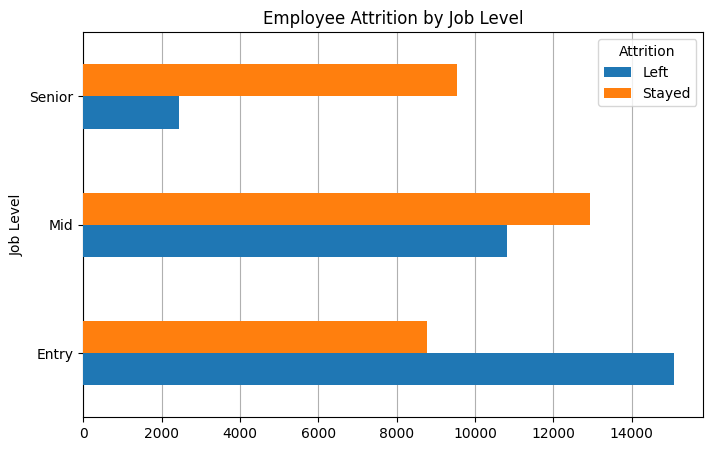

In [33]:
pd.crosstab(df["Job Level"], df["Attrition"]).plot.barh(zorder = 3, figsize = (8,5))
plt.grid(axis="x", zorder = 1)
plt.title("Employee Attrition by Job Level")
plt.show()

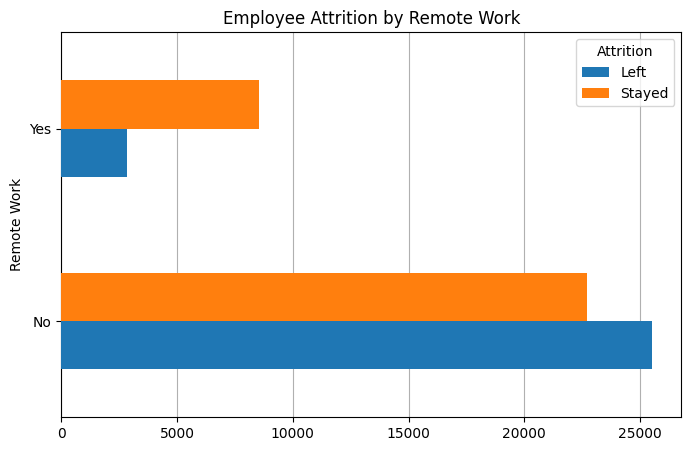

In [34]:
pd.crosstab(df["Remote Work"], df["Attrition"]).plot.barh(zorder = 3, figsize = (8,5))
plt.grid(axis="x", zorder = 1)
plt.title("Employee Attrition by Remote Work")
plt.show()

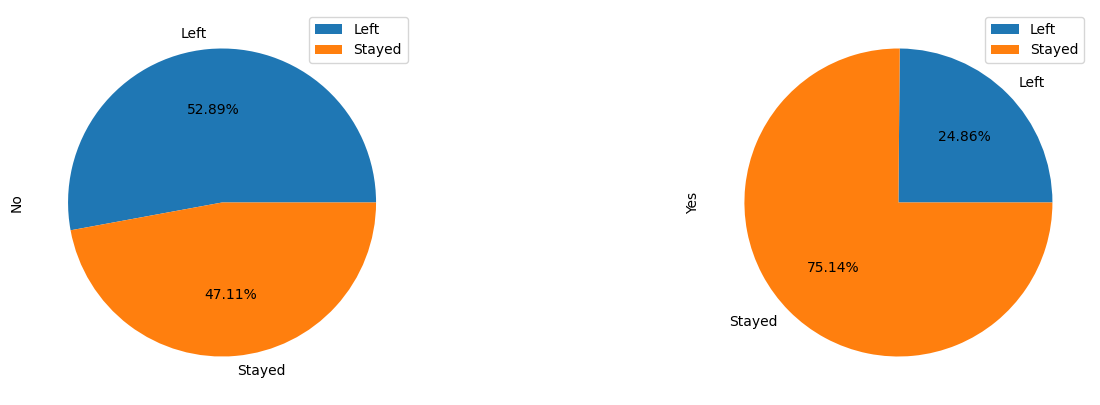

In [35]:
pd.crosstab(df["Attrition"], df["Remote Work"]).plot.pie(subplots = True, figsize = (16,5) , autopct = "%.2f%%")
plt.show()

In [36]:
df[cat_cols].head()

,Gender,Job Role,Work-Life Balance,Job Satisfaction,Performance Rating,Overtime,Education Level,Marital Status,Job Level,Company Size,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,Male,Education,Excellent,Medium,Average,No,Associate Degree,Married,Mid,Medium,No,No,No,Excellent,Medium,Stayed
1,Female,Media,Poor,High,Low,No,Master’s Degree,Divorced,Mid,Medium,No,No,No,Fair,Low,Stayed
2,Female,Healthcare,Good,High,Low,No,Bachelor’s Degree,Married,Mid,Medium,No,No,No,Poor,Low,Stayed
3,Female,Education,Good,High,High,No,High School,Single,Mid,Small,Yes,No,No,Good,Medium,Stayed
4,Male,Education,Fair,Very High,Average,Yes,High School,Divorced,Senior,Medium,No,No,No,Fair,Medium,Stayed


In [37]:
nominal = ["Gender" , "Job Role" , "Overtime" , "Remote Work" , "Leadership Opportunities" , 'Marital Status', "Innovation Opportunities"]
ordinal = [i for i in cat_cols[:-1] if i not in nominal]

In [38]:
nominal

['Gender',
 'Job Role',
 'Overtime',
 'Remote Work',
 'Leadership Opportunities',
 'Marital Status',
 'Innovation Opportunities']

In [39]:
ordinal

['Work-Life Balance',
 'Job Satisfaction',
 'Performance Rating',
 'Education Level',
 'Job Level',
 'Company Size',
 'Company Reputation',
 'Employee Recognition']

In [40]:
ohe = OneHotEncoder(drop= "first")

In [41]:
nominal_encoded = ohe.fit_transform(df[nominal])

In [42]:
nominal_encoded

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 174020 stored elements and shape (59598, 11)>

In [43]:
nominal_encoded.toarray()

array([[1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 0., 0.]], shape=(59598, 11))

In [44]:
ohe.get_feature_names_out()

array(['Gender_Male', 'Job Role_Finance', 'Job Role_Healthcare',
       'Job Role_Media', 'Job Role_Technology', 'Overtime_Yes',
       'Remote Work_Yes', 'Leadership Opportunities_Yes',
       'Marital Status_Married', 'Marital Status_Single',
       'Innovation Opportunities_Yes'], dtype=object)

In [45]:
new_df = pd.DataFrame(nominal_encoded.toarray(), columns=ohe.get_feature_names_out())

In [46]:
new_df

,Gender_Male,Job Role_Finance,Job Role_Healthcare,Job Role_Media,Job Role_Technology,Overtime_Yes,Remote Work_Yes,Leadership Opportunities_Yes,Marital Status_Married,Marital Status_Single,Innovation Opportunities_Yes
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
59593,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
59594,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
59595,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
59596,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [47]:
df = pd.concat([df, new_df] , axis=1)

In [48]:
df

,Age,Gender,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Distance from Home,...,Job Role_Finance,Job Role_Healthcare,Job Role_Media,Job Role_Technology,Overtime_Yes,Remote Work_Yes,Leadership Opportunities_Yes,Marital Status_Married,Marital Status_Single,Innovation Opportunities_Yes
0,31,Male,Education,5390,Excellent,Medium,Average,2,No,22,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,59,Female,Media,5534,Poor,High,Low,3,No,21,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,24,Female,Healthcare,8159,Good,High,Low,0,No,11,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,36,Female,Education,3989,Good,High,High,1,No,27,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,56,Male,Education,4821,Fair,Very High,Average,0,Yes,71,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59593,50,Female,Education,4414,Fair,High,Average,1,Yes,66,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
59594,18,Male,Healthcare,8040,Fair,High,High,3,No,42,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
59595,22,Female,Technology,7944,Fair,High,High,0,Yes,34,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
59596,23,Male,Education,2931,Fair,Very High,Average,0,No,62,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [49]:
df.drop(nominal, axis=1, inplace=True)

In [50]:
df

,Age,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Distance from Home,Education Level,Number of Dependents,Job Level,...,Job Role_Finance,Job Role_Healthcare,Job Role_Media,Job Role_Technology,Overtime_Yes,Remote Work_Yes,Leadership Opportunities_Yes,Marital Status_Married,Marital Status_Single,Innovation Opportunities_Yes
0,31,5390,Excellent,Medium,Average,2,22,Associate Degree,0,Mid,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,59,5534,Poor,High,Low,3,21,Master’s Degree,3,Mid,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,24,8159,Good,High,Low,0,11,Bachelor’s Degree,3,Mid,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,36,3989,Good,High,High,1,27,High School,2,Mid,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,56,4821,Fair,Very High,Average,0,71,High School,0,Senior,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59593,50,4414,Fair,High,Average,1,66,Bachelor’s Degree,2,Senior,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
59594,18,8040,Fair,High,High,3,42,Associate Degree,0,Senior,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
59595,22,7944,Fair,High,High,0,34,Master’s Degree,2,Entry,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
59596,23,2931,Fair,Very High,Average,0,62,Bachelor’s Degree,0,Entry,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [51]:
df["Work-Life Balance"].unique()

array(['Excellent', 'Poor', 'Good', 'Fair'], dtype=object)

In [52]:
order = ["Poor" , "Fair" , "Good" , "Excellent"]

In [53]:
ord_enc = OrdinalEncoder(categories=[order])

In [54]:
df["Work-Life Balance"] = ord_enc.fit_transform(df[["Work-Life Balance"]])

In [55]:
df.head()

,Age,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Distance from Home,Education Level,Number of Dependents,Job Level,...,Job Role_Finance,Job Role_Healthcare,Job Role_Media,Job Role_Technology,Overtime_Yes,Remote Work_Yes,Leadership Opportunities_Yes,Marital Status_Married,Marital Status_Single,Innovation Opportunities_Yes
0,31,5390,3.0,Medium,Average,2,22,Associate Degree,0,Mid,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,59,5534,0.0,High,Low,3,21,Master’s Degree,3,Mid,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,24,8159,2.0,High,Low,0,11,Bachelor’s Degree,3,Mid,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,36,3989,2.0,High,High,1,27,High School,2,Mid,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,56,4821,1.0,Very High,Average,0,71,High School,0,Senior,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [56]:
for i in ordinal:
    print(df[i].unique())

[3. 0. 2. 1.]
['Medium' 'High' 'Very High' 'Low']
['Average' 'Low' 'High' 'Below Average']
['Associate Degree' 'Master’s Degree' 'Bachelor’s Degree' 'High School'
 'PhD']
['Mid' 'Senior' 'Entry']
['Medium' 'Small' 'Large']
['Excellent' 'Fair' 'Poor' 'Good']
['Medium' 'Low' 'High' 'Very High']


In [57]:
categories = [['Low', 'Medium', 'High', 'Very High' ],
['Low', 'Below Average', 'Average', 'High' ],
['High School', 'Bachelor’s Degree', 'Associate Degree', 'Master’s Degree', 'PhD'],
['Entry', 'Mid', 'Senior' ],
['Small', 'Medium', 'Large'],
['Poor', 'Fair', 'Good', 'Excellent'],
['Low', 'Medium', 'High', 'Very High']]

In [58]:
ordinal

['Work-Life Balance',
 'Job Satisfaction',
 'Performance Rating',
 'Education Level',
 'Job Level',
 'Company Size',
 'Company Reputation',
 'Employee Recognition']

In [59]:
for col, category in zip(ordinal[1:], categories):
    oe = OrdinalEncoder(categories=[category])
    df[col] = oe.fit_transform(df[[col]])

In [60]:
for col, category in zip(ordinal[1:], categories):
    print(col, category)

Job Satisfaction ['Low', 'Medium', 'High', 'Very High']
Performance Rating ['Low', 'Below Average', 'Average', 'High']
Education Level ['High School', 'Bachelor’s Degree', 'Associate Degree', 'Master’s Degree', 'PhD']
Job Level ['Entry', 'Mid', 'Senior']
Company Size ['Small', 'Medium', 'Large']
Company Reputation ['Poor', 'Fair', 'Good', 'Excellent']
Employee Recognition ['Low', 'Medium', 'High', 'Very High']


In [61]:
df.head()

,Age,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Distance from Home,Education Level,Number of Dependents,Job Level,...,Job Role_Finance,Job Role_Healthcare,Job Role_Media,Job Role_Technology,Overtime_Yes,Remote Work_Yes,Leadership Opportunities_Yes,Marital Status_Married,Marital Status_Single,Innovation Opportunities_Yes
0,31,5390,3.0,1.0,2.0,2,22,2.0,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,59,5534,0.0,2.0,0.0,3,21,3.0,3,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,24,8159,2.0,2.0,0.0,0,11,1.0,3,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,36,3989,2.0,2.0,3.0,1,27,0.0,2,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,56,4821,1.0,3.0,2.0,0,71,0.0,0,2.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [62]:
le = LabelEncoder()

In [63]:
df["Attrition"] = le.fit_transform(df[["Attrition"]])

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59598 entries, 0 to 59597
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           59598 non-null  int64  
 1   Monthly Income                59598 non-null  int64  
 2   Work-Life Balance             59598 non-null  float64
 3   Job Satisfaction              59598 non-null  float64
 4   Performance Rating            59598 non-null  float64
 5   Number of Promotions          59598 non-null  int64  
 6   Distance from Home            59598 non-null  int64  
 7   Education Level               59598 non-null  float64
 8   Number of Dependents          59598 non-null  int64  
 9   Job Level                     59598 non-null  float64
 10  Company Size                  59598 non-null  float64
 11  Company Tenure                59598 non-null  int64  
 12  Company Reputation            59598 non-null  float64
 13  E

In [65]:
df.columns

Index(['Age', 'Monthly Income', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Number of Promotions', 'Distance from Home',
       'Education Level', 'Number of Dependents', 'Job Level', 'Company Size',
       'Company Tenure', 'Company Reputation', 'Employee Recognition',
       'Attrition', 'Gender_Male', 'Job Role_Finance', 'Job Role_Healthcare',
       'Job Role_Media', 'Job Role_Technology', 'Overtime_Yes',
       'Remote Work_Yes', 'Leadership Opportunities_Yes',
       'Marital Status_Married', 'Marital Status_Single',
       'Innovation Opportunities_Yes'],
      dtype='object')

In [66]:
df = df[['Age', 'Monthly Income', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Number of Promotions', 'Distance from Home',
       'Education Level', 'Number of Dependents', 'Job Level', 'Company Size',
       'Company Tenure', 'Company Reputation', 'Employee Recognition',
       'Gender_Male', 'Job Role_Finance', 'Job Role_Healthcare',
       'Job Role_Media', 'Job Role_Technology', 'Overtime_Yes',
       'Remote Work_Yes', 'Leadership Opportunities_Yes',
       'Marital Status_Married', 'Marital Status_Single',
       'Innovation Opportunities_Yes', 'Attrition']]

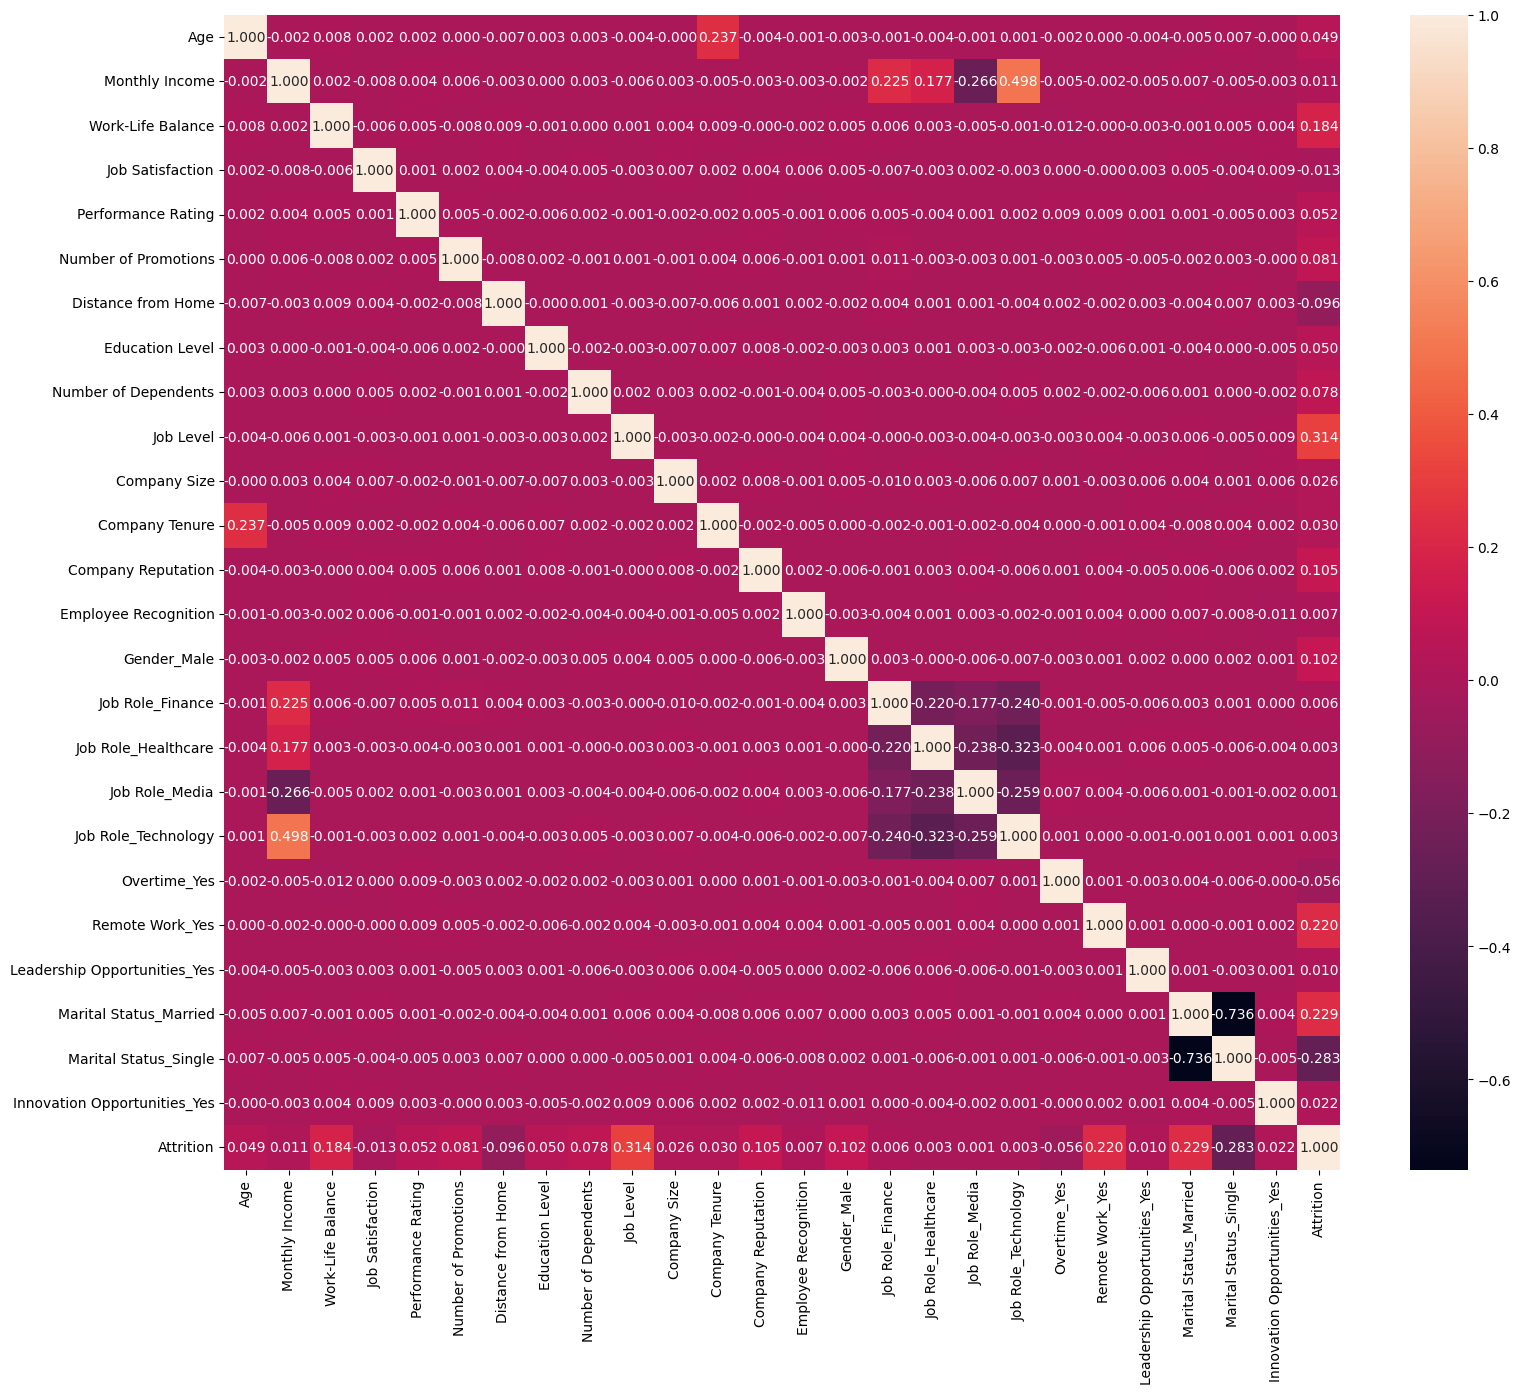

In [67]:
plt.figure(figsize=(18,15))
sns.heatmap(df.corr(), annot=True, fmt=".3f")
plt.show()

In [68]:
np.abs(df.corr()["Attrition"]).sort_values(ascending=False)

Attrition                       1.000000
Job Level                       0.313642
Marital Status_Single           0.282988
Marital Status_Married          0.229132
Remote Work_Yes                 0.220447
Work-Life Balance               0.183987
Company Reputation              0.105042
Gender_Male                     0.101825
Distance from Home              0.095570
Number of Promotions            0.080591
Number of Dependents            0.078337
Overtime_Yes                    0.055664
Performance Rating              0.052131
Education Level                 0.049662
Age                             0.048900
Company Tenure                  0.030285
Company Size                    0.026188
Innovation Opportunities_Yes    0.021536
Job Satisfaction                0.012928
Monthly Income                  0.011377
Leadership Opportunities_Yes    0.010193
Employee Recognition            0.007470
Job Role_Finance                0.006083
Job Role_Technology             0.003091
Job Role_Healthc

In [69]:
from sklearn.preprocessing import StandardScaler

In [70]:
scaler = StandardScaler()

In [71]:
df[num_cols] = scaler.fit_transform(df[num_cols])

In [72]:
df.head()

,Age,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Distance from Home,Education Level,Number of Dependents,Job Level,...,Job Role_Healthcare,Job Role_Media,Job Role_Technology,Overtime_Yes,Remote Work_Yes,Leadership Opportunities_Yes,Marital Status_Married,Marital Status_Single,Innovation Opportunities_Yes,Attrition
0,-0.626336,-0.888892,3.0,1.0,2.0,1.173308,-0.983891,2.0,-1.059395,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
1,1.691627,-0.821960,0.0,2.0,0.0,2.178351,-1.019020,3.0,0.869027,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,-1.205827,0.398153,2.0,2.0,0.0,-0.836777,-1.370314,1.0,0.869027,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
3,-0.212414,-1.540084,2.0,2.0,3.0,0.168266,-0.808244,0.0,0.226220,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
4,1.443273,-1.153366,1.0,3.0,2.0,-0.836777,0.737448,0.0,-1.059395,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1


In [73]:
X = df.drop("Attrition" , axis = 1)

In [74]:
y = df["Attrition"]

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y ,train_size=0.75, random_state=45)

In [76]:
X_train.shape

(44698, 25)

In [77]:
X_test.shape

(14900, 25)

In [78]:
model = LogisticRegression()

In [79]:
model.fit(X_train, y_train)

LogisticRegression()

In [80]:
model.score(X_train, y_train)

0.7413530806747506

In [81]:
y_pred = model.predict(X_test)

In [82]:
accuracy_score(y_test, y_pred)

0.73751677852349

In [83]:
imp_col = np.abs(df.corr()["Attrition"]).sort_values(ascending=False)[1 : 8].index.tolist()

In [84]:
new_X_train = X_train[imp_col]
new_X_test = X_test[imp_col]

In [85]:
model2 = LogisticRegression()
model2.fit(new_X_train , y_train)
model2.score(new_X_train, y_train)   # Training accuracy

0.7249988813817173

In [86]:
# Testing accuracy - 
y_pred2 = model2.predict(new_X_test)
accuracy_score(y_test, y_pred2)

0.7264429530201342

In [87]:
X_train

,Age,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Distance from Home,Education Level,Number of Dependents,Job Level,...,Job Role_Finance,Job Role_Healthcare,Job Role_Media,Job Role_Technology,Overtime_Yes,Remote Work_Yes,Leadership Opportunities_Yes,Marital Status_Married,Marital Status_Single,Innovation Opportunities_Yes
9843,1.277705,-0.034581,2.0,2.0,2.0,-0.836777,-0.492080,2.0,0.869027,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
18036,-0.957474,0.755123,0.0,3.0,2.0,1.173308,-0.597468,1.0,-1.059395,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5942,1.112136,-1.556817,3.0,1.0,1.0,1.173308,0.421283,0.0,0.226220,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5136,0.698214,-0.757352,3.0,1.0,2.0,0.168266,0.877965,0.0,-1.059395,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
53534,-0.046846,-0.380396,2.0,3.0,2.0,0.168266,1.721070,0.0,-1.059395,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16317,0.035939,-0.673688,1.0,2.0,2.0,-0.836777,-1.440572,1.0,0.869027,2.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
12895,1.608842,0.055592,2.0,2.0,1.0,1.173308,0.596930,0.0,0.869027,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6012,-0.874690,-1.624679,2.0,3.0,1.0,3.183394,0.175378,3.0,0.226220,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
6558,-1.288611,0.254993,1.0,2.0,2.0,-0.836777,0.245637,0.0,-1.059395,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


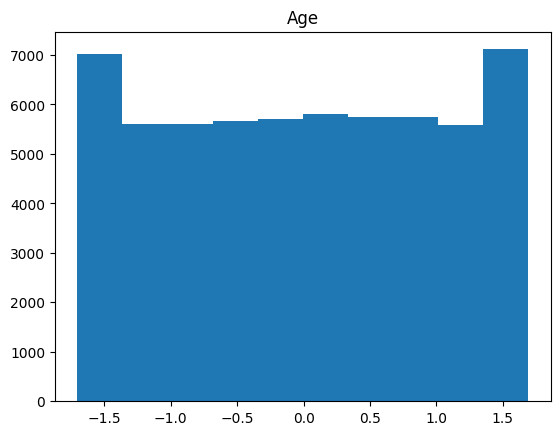

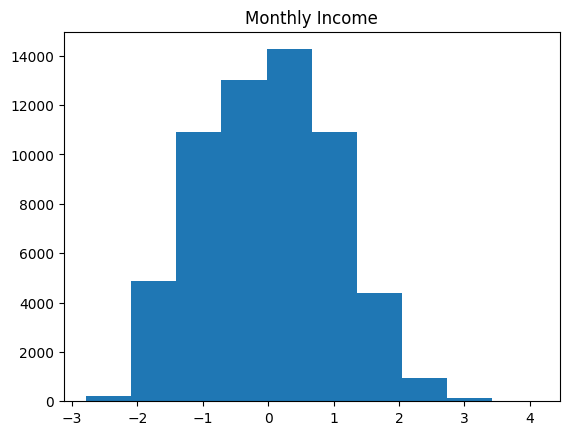

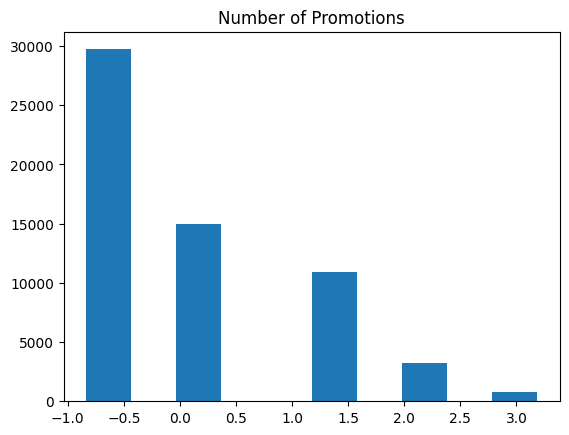

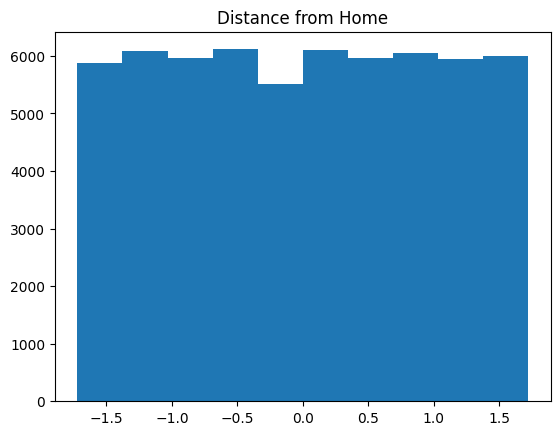

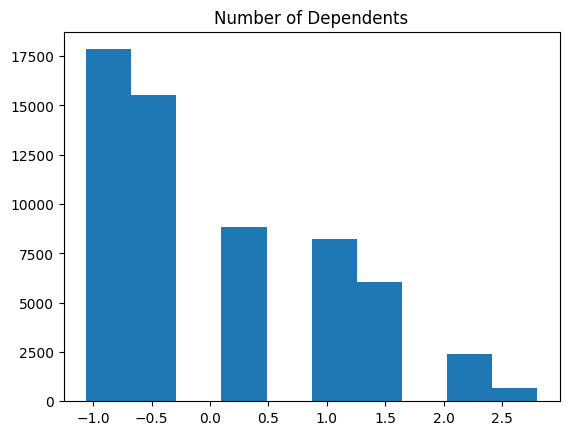

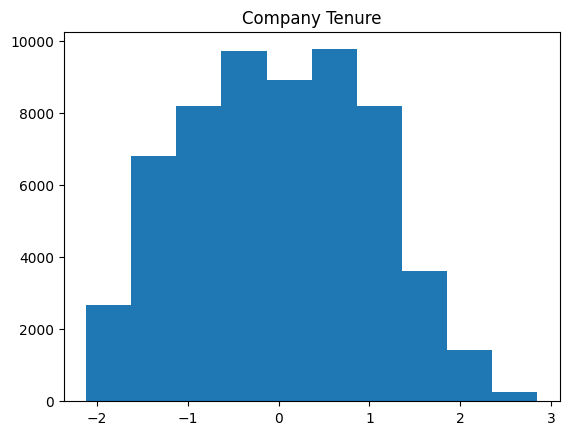

In [88]:
for i in num_cols:
    plt.hist(df[i])
    plt.title(i)
    plt.show()

In [89]:
from sklearn.preprocessing import power_transform

In [90]:
from sklearn.model_selection import KFold, cross_val_score

In [91]:
kf = KFold(n_splits=10)

In [92]:
cvs = cross_val_score(estimator=LogisticRegression(), X = X_train, y = y_train, cv = kf, n_jobs=-1, scoring="accuracy", verbose=True)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    3.3s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.7s finished


In [93]:
cvs

array([0.73221477, 0.73668904, 0.73736018, 0.74362416, 0.74205817,
       0.75615213, 0.74608501, 0.74228188, 0.72723204, 0.74692325])

In [94]:
cvs.mean()

np.float64(0.7410620616396424)

In [95]:
y_test

31411    1
16606    1
51175    0
35463    1
51115    0
        ..
3143     1
2272     0
54368    1
37302    1
7965     0
Name: Attrition, Length: 14900, dtype: int64

In [96]:
y_pred

array([1, 0, 0, ..., 1, 1, 0], shape=(14900,))

In [97]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score

In [98]:
accuracy_score(y_test, y_pred)

0.73751677852349

In [99]:
confusion_matrix(y_test, y_pred)

array([[5106, 2014],
       [1897, 5883]])

In [100]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.72      0.72      7120
           1       0.74      0.76      0.75      7780

    accuracy                           0.74     14900
   macro avg       0.74      0.74      0.74     14900
weighted avg       0.74      0.74      0.74     14900



In [101]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

In [102]:
tn, fp, fn, tp

(np.int64(5106), np.int64(2014), np.int64(1897), np.int64(5883))

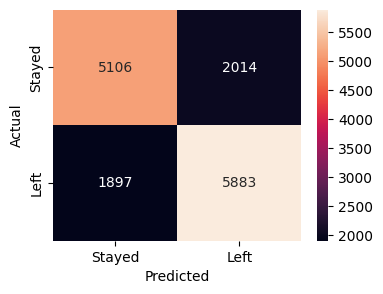

In [103]:
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y_test, y_pred) , annot=True, fmt="d", xticklabels=["Stayed" , "Left"], yticklabels=["Stayed" , "Left"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [104]:
model.predict_proba(X_test)[:, 1][:10]

array([0.51096945, 0.38448196, 0.02504287, 0.51679811, 0.33286112,
       0.15979972, 0.90177245, 0.91960119, 0.89413443, 0.54809948])

In [105]:
model.predict(X_test)[:10]

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 1])

In [106]:
y_prob = model.predict_proba(X_test)[:, 1]

In [107]:
fpr, tpr, th = roc_curve(y_test, y_prob)

In [108]:
auc_score = roc_auc_score(y_test, y_prob)

In [109]:
auc_per = np.round(auc_score*100, 2)
auc_per

np.float64(82.82)

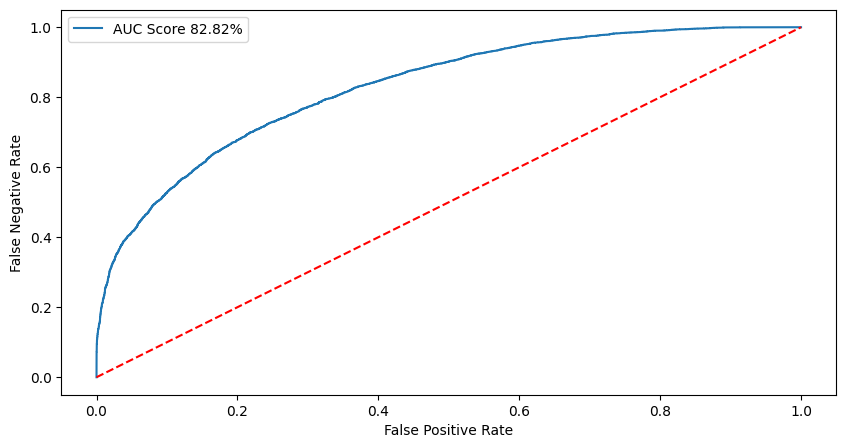

In [110]:
plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, label = f"AUC Score {auc_per}%")
plt.plot([0, 1], [0, 1], "r--")
plt.xlabel("False Positive Rate")
plt.ylabel("False Negative Rate")
plt.legend()
plt.show()